<h2>1. Introduction</h2>

## Customer Churn

Customer Churn is one of the important metrics to evaluate the growth potential of a business enterprise. It is measured as the percentage of customers that stopped using a company's product or services at the end of a time period by the number of customers it had at the beginning of the time period.
Customer churn analysis is used widely by telecommunication services, internet service providers, online streaming services, insuarance firms, etc. as the cost of retaining an existing customer is cheaper than acquiring a new one. Now, churn can be volunatry or  involuntary. Involutary churn can be the decision of a customer to switch to an alternative company or service providers. Involuntary churn includes relocation to other location, death, etc. In majority of the application, analysis is based on involuntary churn which can be primarily due to the customer's current product or service experience of a company or due to a better alternative options provided by a company's business competitors.
In this study, we use the data from a telecommunication company to perform churn analysis. Such an analysis will help in understanding the customer retention policies that are required to reduce the churn rate. The structure of this study are as follows:
- **I**: Exploratory data analysis

- **II**: Data pre-processing

- **III**: Predictive modeling

- **IV**: Conclusion

In [1]:
from datetime import datetime, timedelta,date
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import Image
from IPython.core.display import HTML 

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import mean_squared_error

import sklearn.metrics as metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

from sklearn.cluster import KMeans

> ## I. Exploratory data analysis:

In [2]:
TelecomChurn = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
#first few rows
TelecomChurn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# data summary
print("Data dimension:",TelecomChurn.shape)
TelecomChurn.info()

Data dimension: (7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes

## Understanding the dataset
The customer churn data mainly consists of customer's social characteristics, type of service packages used by them and the method of payment. There are 7043 observations with 21 features.

The dataset has 21 features and below is the definition:
* customerID: Customer ID, unique identifier for each customer
* gender    : Whether the customer is a male or a female
* SeniorCitizen: Whether the customer is a senior citizen or not (1, 0)
* Partner : Whether the customer has a partner or not (Yes, No)
* Dependents: Whether the customer has dependents or not (Yes, No)
* tenure : Number of months the customer has stayed with the company
* PhoneService : Whether the customer has a phone service or not (Yes, No)
* MultipleLines : Whether the customer has multiple lines or not (Yes, No, No phone service)
* InternetService : Customer’s internet service provider (DSL, Fiber optic, No)
* OnlineSecurity : Whether the customer has online security or not (Yes, No, No internet service)
* OnlineBackup : Whether the customer has online backup or not (Yes, No, No internet service)
* DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
* TechSupport : Whether the customer has tech support or not (Yes, No, No internet service)
* StreamingTV : Whether the customer has streaming TV or not (Yes, No, No internet service)
* StreamingMovies : Whether the customer has streaming movies or not (Yes, No, No internet service)
* Contract : The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
* PaymentMethod : The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges: The amount charged to the customer monthly
* TotalCharges : The total amount charged to the customer
* Churn: Whether the customer churned or not (Yes or No)

In [4]:
# encoding the churn variable into 0 and 1
TelecomChurn['Churn'] = TelecomChurn['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)
TelecomChurn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [5]:
TelecomChurn['Churn'].value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

The variable 'Total Charges' is converted into a numeric format. Then check for any missing observations. Some observations for this variable is found to be missing. I'll be deleting the missing observations from the dataset.

In [6]:
# changing TotalCharges column from object to float
TelecomChurn['TotalCharges'] = TelecomChurn['TotalCharges'].apply(pd.to_numeric, downcast='float', errors='coerce')
print(TelecomChurn.dtypes)

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


In [7]:
# check for null and total observations related to it
null_columns=TelecomChurn.columns[TelecomChurn.isnull().any()]
TelecomChurn[null_columns].isnull().sum()

TotalCharges    11
dtype: int64


As we see above, the column TotalCharges has 11 missing values. We are going to replace the value missing by the mean.         


In [8]:
meanTotalCharge = TelecomChurn.TotalCharges.mean()
TelecomChurn['TotalCharges']=TelecomChurn['TotalCharges'].fillna(meanTotalCharge)

In [9]:
# summary description of the numeric variables of the dataset
TelecomChurn[['tenure', 'MonthlyCharges', 'TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000259
min,0.000000,18.250000,18.799999
25%,9.000000,35.500000,402.225006
50%,29.000000,70.350000,1400.550049
75%,55.000000,89.850000,3786.599976
max,72.000000,118.750000,8684.799805


There is no presence of negative or missing observations in these three variables. Next, I check the dimension of the categorical variables by looking at their unique values. The unique values vary between 2 and 4 for the categorical variables.

In [10]:
TelecomChurn.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [11]:
# to check the number of unique values in each of the columns
for col in list(TelecomChurn.columns):
    print(col, TelecomChurn[col].nunique())

customerID 7043
gender 2
SeniorCitizen 2
Partner 2
Dependents 2
tenure 73
PhoneService 2
MultipleLines 3
InternetService 3
OnlineSecurity 3
OnlineBackup 3
DeviceProtection 3
TechSupport 3
StreamingTV 3
StreamingMovies 3
Contract 3
PaperlessBilling 2
PaymentMethod 4
MonthlyCharges 1585
TotalCharges 6531
Churn 2


In [12]:
# calculate the proportion of churn vs non-churn
TelecomChurn['Churn'].mean()

0.2653698707936959

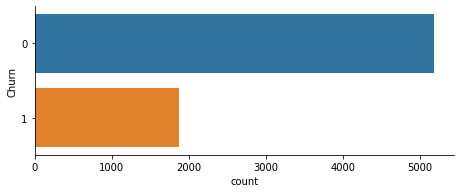

In [13]:
ax = sns.catplot(y="Churn", kind="count", data=TelecomChurn, height=2.6, aspect=2.5, orient='h')

The churn rate is around 27% in this dataset. Now, I'll be looking at few variables which can give us more information about the factors that can effect customer churn.

''

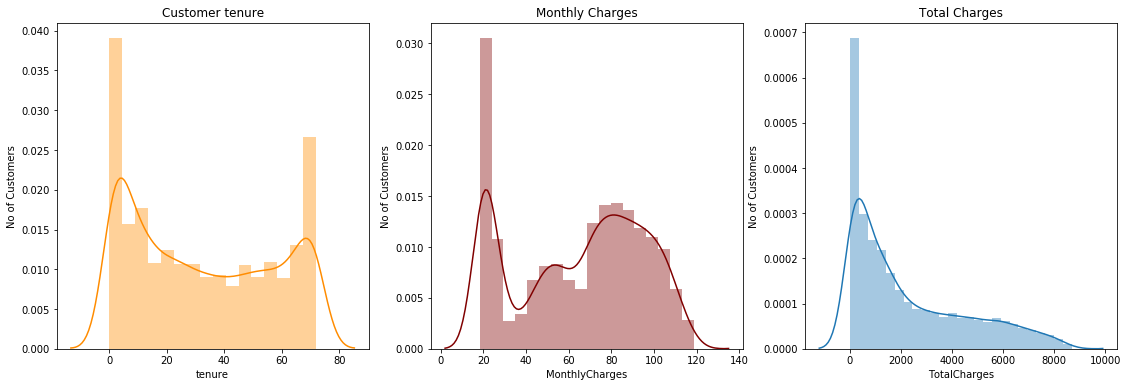

In [14]:
f,axes = plt.subplots(ncols=3, figsize=(19,6))
sns.distplot(TelecomChurn.tenure,kde=True,ax=axes[0], color='darkorange').set_title("Customer tenure")
axes[0].set_ylabel('No of Customers')

sns.distplot(TelecomChurn.MonthlyCharges,kde=True,ax=axes[1],color='maroon').set_title('Monthly Charges')
axes[1].set_ylabel('No of Customers')

sns.distplot(TelecomChurn.TotalCharges,kde=True,ax=axes[2]).set_title('Total Charges')
axes[2].set_ylabel('No of Customers')
;

From the observations above, it looks like:
* The **tenure** seems to be bimodal. The first most represent who haven't been in the company for a long time, the second some faithfull customers who have been with the company for a very long time.
* Looking at **Monthlycharges**, It looks like newer customer are charged more than those who stay longer with the company. Most customers seems to pay between 70-90.
* **Totalcharges** is a right skewed distribution, there are a lot of customers with lower total charges, but fewer with very large balance.

Text(0.5, 1.0, 'Churn Distribution by gender')

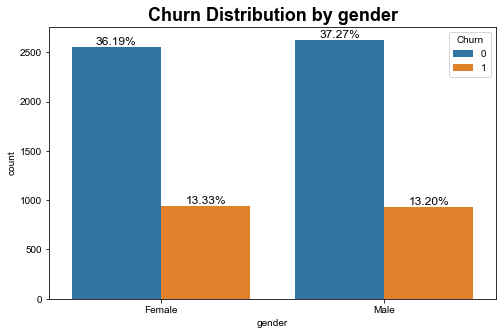

In [15]:
# calculate the proportion of churn by gender
plt.figure(figsize=(8,5))
p=sns.countplot(x="gender", hue="Churn", data=TelecomChurn)
ax=plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+2, '{:.2f}%'.format(100*(height/TelecomChurn.shape[0])),fontsize=12,ha='center',va='bottom')
sns.set(font_scale=1.5)
plt.title('Churn Distribution by gender', fontweight="bold")

There is no such significant difference in churn rate by gender.

In [16]:
TelecomChurn.groupby(by='Contract')['Churn'].sum()

Contract
Month-to-month    1655
One year           166
Two year            48
Name: Churn, dtype: int64

In [17]:
TelecomChurn.groupby(by='Contract')['Churn'].count()

Contract
Month-to-month    3875
One year          1473
Two year          1695
Name: Churn, dtype: int64

Churn by contract: Contract
Month-to-month    42.709677
One year          11.269518
Two year           2.831858
Name: Churn, dtype: float64


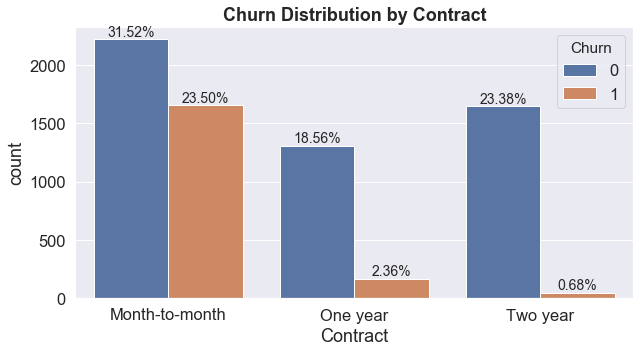

In [18]:
# calculate the proportion of churn by contract
plt.figure(figsize=(10,5))
p=sns.countplot(x='Contract',hue='Churn',data=TelecomChurn)
ax=plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height+2,'{:.2f}%'.format(100*(height/TelecomChurn.shape[0])),fontsize=14,ha='center',va='bottom')
sns.set(font_scale=1.5)
plt.title('Churn Distribution by Contract', fontweight='bold')

churn_by_contract = TelecomChurn.groupby(by='Contract')['Churn'].sum() / TelecomChurn.groupby(by='Contract')['Churn'].count() * 100.0
print('Churn by contract:',churn_by_contract)

Churn rate is highest for the short-term contract compared to the long-term contract. For a month-to-month contract, the churn rate is 42% which is higher compared to the 'one-year' or the 'two-year' contract. The churn rates for the 'one-year' or the 'two-year' contract are 11% and 2% respectively.

In [19]:
TelecomChurn.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

Churn by payment method: PaymentMethod
Bank transfer (automatic)    16.709845
Credit card (automatic)      15.243101
Electronic check             45.285412
Mailed check                 19.106700
Name: Churn, dtype: float64


,Churn
PaymentMethod,
Bank transfer (automatic),16.709845
Credit card (automatic),15.243101
Electronic check,45.285412
Mailed check,19.106700


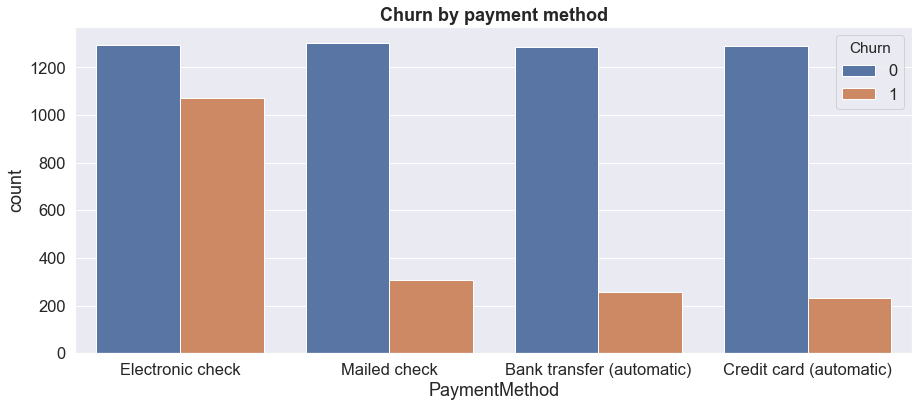

In [20]:
# calculate the proportion of churn by payment method
plt.figure(figsize=(15,6))
p=sns.countplot(x='PaymentMethod',hue='Churn', data=TelecomChurn)

plt.title ('Churn by payment method', fontweight='bold')

churn_by_payment = TelecomChurn.groupby(by='PaymentMethod')['Churn'].sum() / TelecomChurn.groupby(by='PaymentMethod')['Churn'].count() * 100.0
print('Churn by payment method:',churn_by_payment)
pd.DataFrame(churn_by_payment)

The churn rate is the highest when the method of payment is through an electronic check. The other segments of the payment methods have a churn rate between 15% - 20%. The graph for this analysis is presented below.

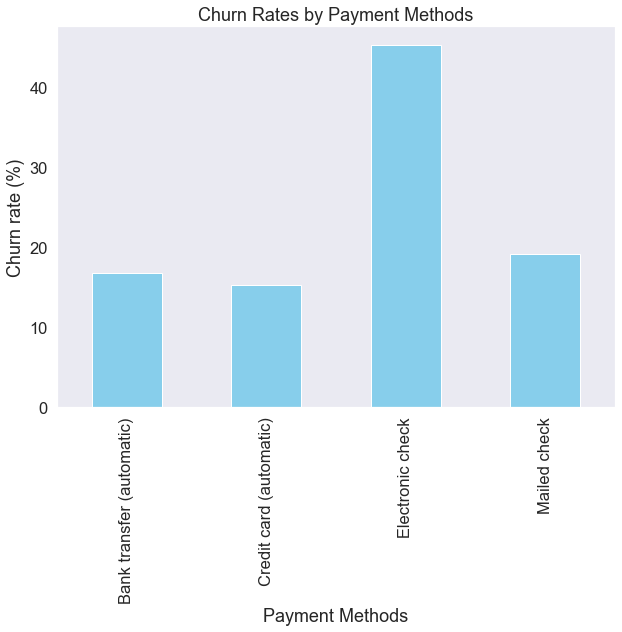

In [21]:
# figure
ax = churn_by_payment.plot(
    kind='bar',
    color='skyblue',
    grid=False,
    figsize=(10, 7),
    title='Churn Rates by Payment Methods'
)

ax.set_xlabel('Payment Methods')
ax.set_ylabel('Churn rate (%)')

plt.show()

In [22]:
# proportion of churn by gender and contract
churn_gendercontract = TelecomChurn.groupby(['gender', 'Contract'])['Churn'].sum()/TelecomChurn.groupby(['gender', 'Contract'])['Churn'].count()*100
churn_gendercontract

gender  Contract      
Female  Month-to-month    43.740260
        One year          10.445682
        Two year           2.603550
Male    Month-to-month    41.692308
        One year          12.052980
        Two year           3.058824
Name: Churn, dtype: float64

In [23]:
# keep gender in row and contract by column
churn_gendercontract1 = churn_gendercontract.unstack('Contract').fillna(0)
churn_gendercontract1 

Contract,Month-to-month,One year,Two year
gender,,,
Female,43.740260,10.445682,2.603550
Male,41.692308,12.052980,3.058824


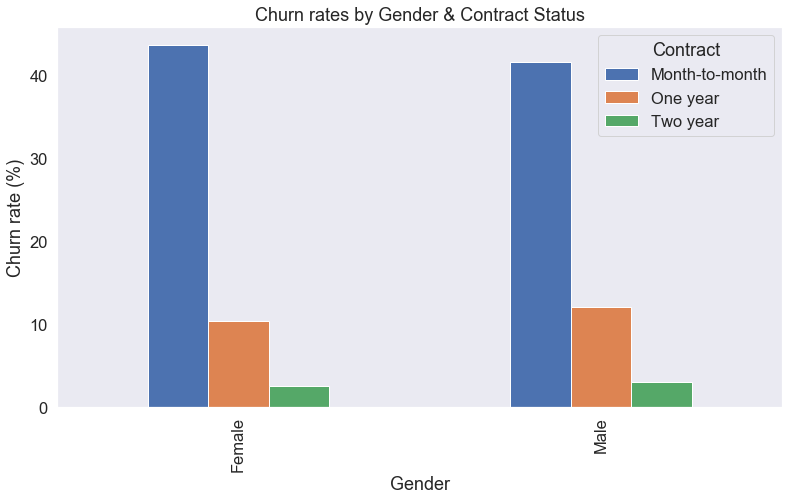

In [24]:
# figure
ax = churn_gendercontract1.plot(
    kind='bar', 
    grid= False,
    figsize=(13,7)
)

ax.set_title('Churn rates by Gender & Contract Status')
ax.set_xlabel('Gender')
ax.set_ylabel('Churn rate (%)')

plt.show()

The above figure analyzed the churn rate when it is grouped by gender and contract type. Irrespective of the gender, we find that the churn rate is the highest for the month-to-month contract type. The conclusion of this analysis is similar to the conclusion derived from their individual analysis presented above.

In [25]:
# observations by citizen type
TelecomChurn['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [26]:
# Total observations by citizen type, contract and tech support 
TelecomChurn.groupby(['SeniorCitizen','Contract','TechSupport'])['Churn'].count()

SeniorCitizen  Contract        TechSupport        
0              Month-to-month  No                     1982
                               No internet service     512
                               Yes                     574
               One year        No                      458
                               No internet service     348
                               Yes                     477
               Two year        No                      203
                               No internet service     614
                               Yes                     733
1              Month-to-month  No                      698
                               No internet service      12
                               Yes                      97
               One year        No                       99
                               No internet service      16
                               Yes                      75
               Two year        No                       33
     

In [27]:
# proportion of churn by gender and contract
churn_citizentechcontract = TelecomChurn.groupby(['SeniorCitizen','Contract','TechSupport'])['Churn'].sum()/TelecomChurn.groupby(['SeniorCitizen','Contract','TechSupport'])['Churn'].count()*100
churn_citizentechcontract

SeniorCitizen  Contract        TechSupport        
0              Month-to-month  No                     47.780020
                               No internet service    18.359375
                               Yes                    30.139373
               One year        No                     14.628821
                               No internet service     2.586207
                               Yes                    12.788260
               Two year        No                      5.911330
                               No internet service     0.814332
                               Yes                     3.410641
1              Month-to-month  No                     57.736390
                               No internet service    41.666667
                               Yes                    34.020619
               One year        No                     15.151515
                               No internet service     0.000000
                               Yes                   

In [28]:
# keep gender and payment method in row and contract by column
churn_citizentechcontract1 = churn_citizentechcontract.unstack(['TechSupport']).fillna(0)
churn_citizentechcontract1

TechSupport                          No  No internet service        Yes
SeniorCitizen Contract                                                 
0             Month-to-month  47.780020            18.359375  30.139373
              One year        14.628821             2.586207  12.788260
              Two year         5.911330             0.814332   3.410641
1             Month-to-month  57.736390            41.666667  34.020619
              One year        15.151515             0.000000  18.666667
              Two year         6.060606             0.000000   4.545455

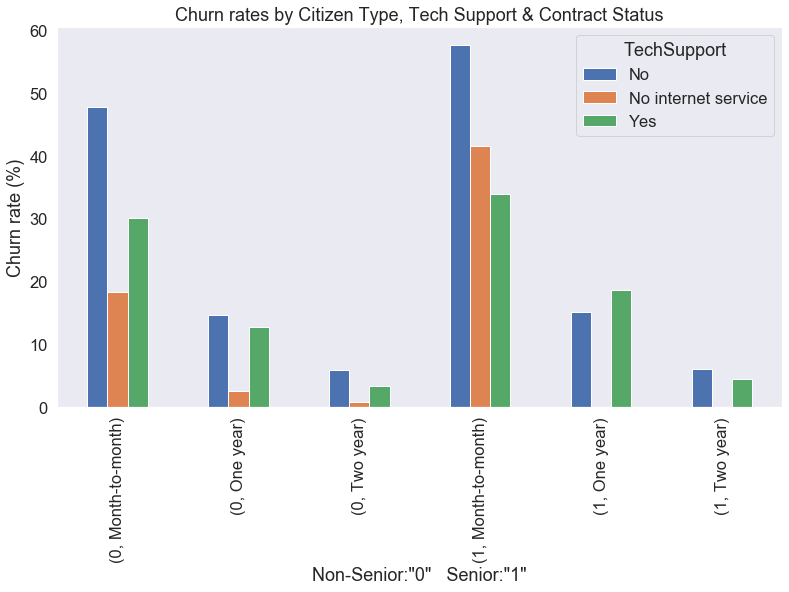

In [29]:
# figure
ax = churn_citizentechcontract1.plot(
    kind='bar', 
    grid= False,
    figsize=(13,7)
)

ax.set_title('Churn rates by Citizen Type, Tech Support & Contract Status')
ax.set_xlabel('Non-Senior:"0"   Senior:"1"')
ax.set_ylabel('Churn rate (%)')

plt.xticks()
plt.show()

Few interesting conclusions can be derived from the above exploratory data analysis. The above analysis is based on the citizen type, contract type and technical support. The senior citizen is denoted as 1 or 0 otherwise. Non-senior citizens are the majority in this dataset by around 5:1 ratio. For the senior citizen, there is no churn rate for the no internet service for the one-year and two-year contracts.

The availability of tech support helps in reducing the churn rate compared to those with no tech support. Though churn rate is even lower for those with no internet service compared to those with technical support. It is not clear if they have any other means of customer service available to them without an internet service or not. Nevertheless, improvement in the technical support can be useful in reducing the churn rate.

In [30]:
# summary of tenure, monthly charges and total charges
TelecomChurn[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000259
min,0.000000,18.250000,18.799999
25%,9.000000,35.500000,402.225006
50%,29.000000,70.350000,1400.550049
75%,55.000000,89.850000,3786.599976
max,72.000000,118.750000,8684.799805


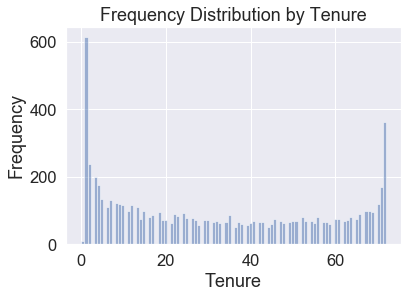

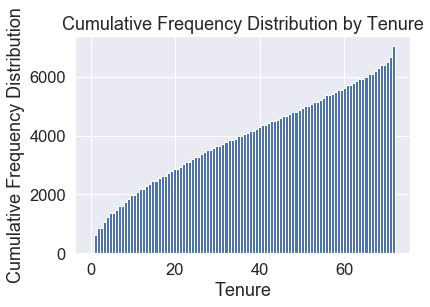

In [31]:
# plot a histogram
plt.hist(TelecomChurn['tenure'], bins= 100, alpha=0.5,)
plt.title('Frequency Distribution by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Frequency')
plt.show()


plt.hist(TelecomChurn['tenure'], cumulative=1, bins= 100)
plt.title('Cumulative Frequency Distribution by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Cumulative Frequency Distribution')
plt.show()

From the above analysis, I found that a significant share of the customers are either new with a tenure of less than 10 months or old customers with more than 70 months of tenure. From the cumulative frequency distribution plot, we find that around 20% of the customers have a tenure of less than 10 months. Around 70% of the customers have a tenure between 10 months and 60 months. And the remaining 20% have a tenure more than 60 months.

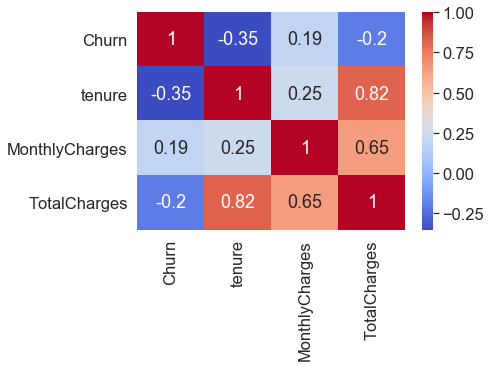

In [32]:
# finding correlations
corrdata = TelecomChurn[['Churn','tenure','MonthlyCharges','TotalCharges']]
corr = corrdata.corr()
# plot the heatmap
sns.heatmap(corr,cmap="coolwarm",
        xticklabels=corrdata.columns,
        yticklabels=corrdata.columns,annot=True)

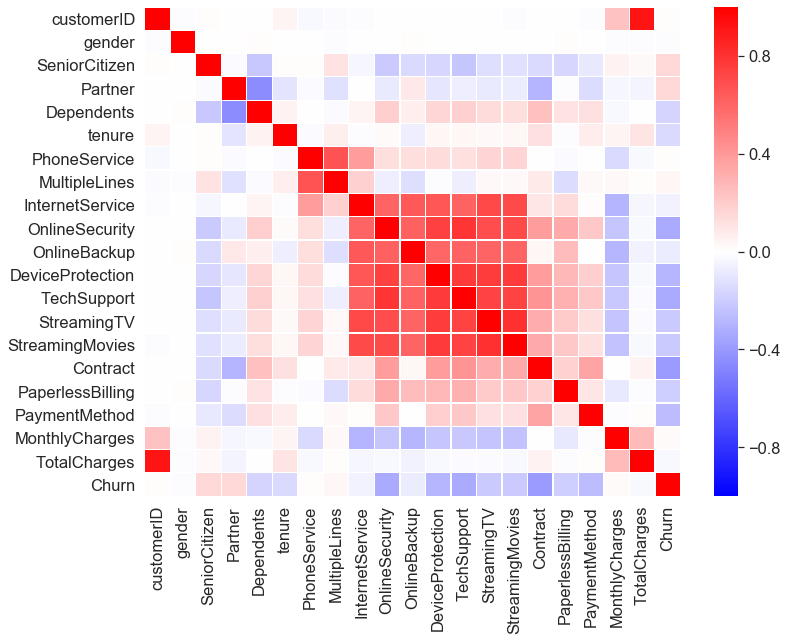

In [33]:
##Correlation heatmap (Pearson method)
plt.figure(figsize=(12, 9))

corr = TelecomChurn.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, vmin = -1, vmax = 1, cmap = 'bwr') #cmap="YlGnBu")

In [77]:
from sklearn.decomposition import PCA
pca = PCA(n_components=len(X.columns)-4)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents
             , columns = [('pc_' + str(x)) for x in range(len(X.columns)-4)])

In [78]:
#pca = PCA(n_components=len(X.columns))
#principalComponents = pca.fit_transform(X)
components = pd.DataFrame(pca.components_, columns=X.columns)
print(components.shape)
components.head()

(35, 39)


,gender,SeniorCitizen,Partner,Dependents,PhoneService,PaperlessBilling,tenure,MonthlyCharges,MultipleLines_No,MultipleLines_No phone service,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,-0.000173,0.002292,0.003326,-0.000662,0.002030,0.004782,0.425631,0.904192,-0.006342,-0.002030,...,-0.001053,-0.008805,0.009858,-0.002560,0.000922,0.001637,0.001547,0.001355,0.002485,-0.005387
1,0.000290,-0.001752,0.006959,0.004443,-0.001700,-0.004164,0.904344,-0.425129,-0.002745,0.001700,...,-0.005533,0.007115,-0.001582,-0.014552,0.003494,0.011058,0.003892,0.003812,-0.007416,-0.000288
2,0.006571,0.014573,-0.022752,-0.029997,-0.152343,0.042795,0.014365,-0.021942,-0.083847,0.152343,...,0.311455,-0.245323,-0.066132,0.076676,-0.016481,-0.060195,0.004134,0.005362,0.040049,-0.049545
3,-0.012948,-0.123839,0.060453,0.130975,-0.076423,-0.135016,-0.020418,0.005844,0.084834,0.076423,...,-0.095876,-0.043553,0.139429,-0.218126,0.100817,0.117309,0.030974,0.068314,-0.216378,0.117091
4,0.015231,0.062331,-0.026174,-0.076661,-0.218340,0.135735,-0.001127,-0.012464,-0.299549,0.218340,...,-0.324585,-0.034220,0.358804,0.026207,-0.010782,-0.015424,-0.048610,-0.035830,0.187288,-0.102848


In [79]:
principalDf.head()

,pc_0,pc_1,pc_2,pc_3,pc_4,pc_5,pc_6,pc_7,pc_8,pc_9,...,pc_25,pc_26,pc_27,pc_28,pc_29,pc_30,pc_31,pc_32,pc_33,pc_34
0,-44.918853,-13.562394,2.035839,-0.136428,0.672315,-1.000468,-1.136442,0.707358,-0.011096,0.137139,...,-1.281162e-14,1.612986e-15,2.709727e-14,4.997992e-14,-2.981499e-14,1.022079e-14,-1.226664e-14,7.893879e-15,2.910780e-14,-7.639940e-15
1,-6.381646,4.788737,1.184534,0.738015,-0.688067,0.786398,0.487215,-0.663139,1.084889,0.817467,...,5.510320e-14,3.978536e-14,-3.118537e-14,-3.319909e-14,-4.769119e-15,3.552726e-14,-3.281148e-14,7.515040e-15,7.540786e-15,-1.289602e-14
2,-22.804599,-22.853649,1.027145,0.729275,-1.100428,-0.324017,-0.810312,-0.172509,-0.156553,0.687946,...,8.561788e-14,-1.495195e-14,-3.443986e-14,3.928460e-14,-2.243422e-14,-1.783573e-14,2.331611e-14,-1.593553e-14,-3.650742e-14,1.673935e-14
3,-14.934173,20.987156,1.979402,1.094598,0.158134,0.069068,0.666926,-1.022114,0.602572,0.034271,...,-5.749961e-14,2.531046e-14,-1.835262e-15,-3.412782e-14,-9.623024e-15,1.421733e-14,3.584696e-14,2.725902e-14,-3.860201e-14,-2.142459e-14
4,-7.556088,-30.060522,0.488913,-0.884551,-0.489225,0.598479,-0.009022,-0.155029,-0.033153,0.016490,...,6.251727e-14,1.035360e-13,-2.107857e-14,-8.281469e-14,9.111374e-14,2.366573e-16,-5.799513e-15,-2.096035e-14,2.378970e-14,1.029670e-14


From the above, correlation plot I find some interesting conclusions. Total Charges are highly correlated with tenure and monthly charges. Whereas, correlation between tenure and monthly charges is low.

There is a negative relationship between churn and tenure. There is a positive relationship between churn and tenure. Both these relationships make sense. But, I see a negative relationship between total charges and churn. This means that as the total charges increases, the churn rate goes down. This conclusion is absurd! Why a customer will be willing to pay a higher cost for the services? I'll be droping 'Total Charges' from the final dataset due to high collinearity with tenure and monthly charges, as well as a negative relationship with churn.

> ## II. Data pre-processing:

In this section, I'm going to process the data which will be used for predictive modeling. I'll scale the 'tenure' and 'Monthly Charges', and pre-process the categorical variables.

In [35]:
TelecomChurn.nunique().keys()

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [36]:
# segmenting based on data type and pre-processing
#customer id col
Id_col     = ['customerID']
#Target column. y should be an array
target_col = ["Churn"]
y = (TelecomChurn[target_col]).values.ravel()
# cluster column 
cluster_col = ["tenure"]
#categorical columns with categories less than 6
cat_cols   = TelecomChurn.nunique()[TelecomChurn.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
print(cat_cols)
print('=================================================')
#Binary columns with 2 values
bin_cols   = TelecomChurn.nunique()[TelecomChurn.nunique() == 2].keys().tolist()
print(bin_cols)
print('==================================================')
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]
print(multi_cols)
# continuous column
cont_col = ["tenure","MonthlyCharges"]
print(cont_col)
print('===================================================')
print(y)

['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
['tenure', 'MonthlyCharges']
[0 0 1 ... 0 1 0]


In [37]:
#Label encoding Binary columns
le = LabelEncoder()
binary = TelecomChurn[bin_cols]
print(binary.shape) 
print(binary.info())
binary.head()
for i in bin_cols :
    binary[i] = le.fit_transform(binary[i])

(7043, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
PhoneService        7043 non-null object
PaperlessBilling    7043 non-null object
Churn               7043 non-null int64
dtypes: int64(2), object(5)
memory usage: 385.2+ KB
None


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [38]:
# multi-label categorical columns
dummy_vars = pd.get_dummies(TelecomChurn[multi_cols])
print(dummy_vars.shape)
print(dummy_vars.info())

(7043, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
MultipleLines_No                           7043 non-null uint8
MultipleLines_No phone service             7043 non-null uint8
MultipleLines_Yes                          7043 non-null uint8
InternetService_DSL                        7043 non-null uint8
InternetService_Fiber optic                7043 non-null uint8
InternetService_No                         7043 non-null uint8
OnlineSecurity_No                          7043 non-null uint8
OnlineSecurity_No internet service         7043 non-null uint8
OnlineSecurity_Yes                         7043 non-null uint8
OnlineBackup_No                            7043 non-null uint8
OnlineBackup_No internet service           7043 non-null uint8
OnlineBackup_Yes                           7043 non-null uint8
DeviceProtection_No                        7043 non-null uint8
DeviceProtection_No internet service       7043 non-null uint8


In [39]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(TelecomChurn[cont_col])
scaled = pd.DataFrame(TelecomChurn,columns= cont_col)
scaled.shape
print(scaled.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
tenure            7043 non-null int64
MonthlyCharges    7043 non-null float64
dtypes: float64(1), int64(1)
memory usage: 110.1 KB
None


In [40]:
# creating a dataset to combine pre-processed variables
X = pd.concat([binary,scaled,dummy_vars], axis = 1)
# drop churn variable from the X dataset
X = X.drop(['Churn'],axis=1)
print(X.shape)
print(X.info())

(7043, 39)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
gender                                     7043 non-null int32
SeniorCitizen                              7043 non-null int64
Partner                                    7043 non-null int32
Dependents                                 7043 non-null int32
PhoneService                               7043 non-null int32
PaperlessBilling                           7043 non-null int32
tenure                                     7043 non-null int64
MonthlyCharges                             7043 non-null float64
MultipleLines_No                           7043 non-null uint8
MultipleLines_No phone service             7043 non-null uint8
MultipleLines_Yes                          7043 non-null uint8
InternetService_DSL                        7043 non-null uint8
InternetService_Fiber optic                7043 non-null uint8
InternetService_No                         7043 non-null uint

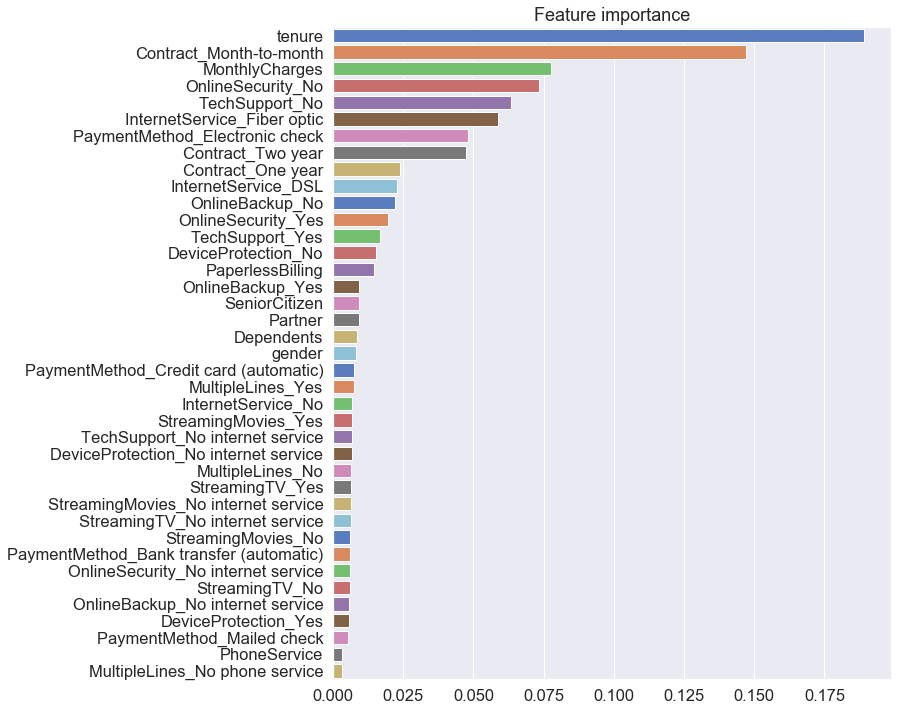

In [41]:
params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
from sklearn.ensemble import RandomForestClassifier


df = pd.get_dummies(X)

x, y = df, y
# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette='muted', orient='h') # palette="Blues_d"

The importances are in line with our previous analysis. The three numerical features are good predictors for churn, specially tenure. As we've seen, customers with Fiber optic are very likely to churn, while those with long term contracts are not. On the other hand, gender and streaming are not important features and It might be interesting to drop additional services with the label 'No internet service', since they are highly correlated.


> ## III. Predictive Modeling    

The objective of this study is to predict the churn vs no-Churn situation from the telecom dataset.Inorder to predict the outcome, we need to predict whether a customer will churn or not i.e.(Churn/NoChurn as (1/0)).

Now for each of the observations, four different events can occur when we try to predict:
- case 1: predicted as 1 which are actually 1. Also known as True Positives (TP).
- case 2: predicted as 1 which are actually 0. Also known as False Positives (FP).Also known as Type I error.
- case 3: predicted as 0 which are actually 0. Also known as True Negatives (TN).
- case 4: predicted as 0 which are actually 1. Also known as False Negatives (FN).Also known as Type II error.

In this study, predicting churn accurately is very important as it has a far-reaching impact on the future prospect of the business. This means a prediction analysis will be able to identify case 1 with greater accuracy. This means the objective of the study is to minimize case 4 or Type II error. There are certain criterias based on which prediction models will be judged. Let's look at those criteria.

Accuracy,precision, recall, F1 and specificity are the different types of precision metrics used in evaluating the performance of the prediction models. These are also used to compare the performances between different alternative models. Accuracy measures the ratio of TP and TN given all the observations. Precision measures the ratio of the relevant class (i.e.Churn(1)) correctly predicted given the total number of predictions made for the relevant class. Recall also known as sensitivity measures the ratio of the relevant class given the actual number of observations of the relevant class. F1 score is the weighted average of precision and recall. It is particularly useful when we want to strike a balance between precision and recall. Sensitivity is the ratio of TN given the actual number of observations that belongs to the negative class. Another important metrics are Receiver Operating Curve (ROC) and Area under the Curve (AUC).

As mentioned earlier, one of the important objectives of the prediction model here is to reduce False Negatives (FN). This means that we have to consider improving the recall. But reducing the FN sometimes leads to an increase in FP which means precision may decrease. In this case, I'll look at the F1 scores along with the AUC values to decide on the best model for this study.

In [42]:
# import machine learning libraries
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm


# creating the function
# XGBoost and SVC functions are used while modeling and are thus not presented here
logreg = LogisticRegression(solver='lbfgs', max_iter = 10000)
DT = DecisionTreeClassifier()
rfc = RandomForestClassifier()
knn = KNeighborsClassifier()

Recursive Feature Elimination (RFE) is a method of selecting a subset of independent variables (features) that are relevant for predicting the target variable i.e. churn in this study. It uses the model accuracy to identify the attributes that contribute the most towards explaining the target variable. One can use logistic regression and tree-based models for feature extraction. I'm using random forest for feature extraction here. 

In [43]:
# recursive feature extraction for the top 10 features
rfe = RFE(rfc, 10)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

#identifying columns for RFE
rfe_data = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : [i for i in X.columns if i not in Id_col + target_col],
                       "ranking" : rfe.ranking_,
                        })

# extract columns as a list
rfe_var = rfe_data[rfe_data["rfe_support"] == True]["columns"].tolist()

rfe_data

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

[ True False  True False False  True  True  True False False False False
  True False  True False False  True False False False False False False
 False False False False False False False False  True False False False
 False  True False]
[ 1  5  1  6 22  1  1  1  4 24 11 21  1 26  1 23 20  1 27 19  3 30 12  2
 28 17  7 25 13 14 29  8  1 18 16 10  9  1 15]


,rfe_support,columns,ranking
0,True,gender,1
1,False,SeniorCitizen,5
2,True,Partner,1
3,False,Dependents,6
4,False,PhoneService,22
5,True,PaperlessBilling,1
6,True,tenure,1
7,True,MonthlyCharges,1
8,False,MultipleLines_No,4
9,False,MultipleLines_No phone service,24


In [44]:
# select a subset of variables for the dataframe based on RFE method
X1 = X[rfe_var]

#### Logistic Regression

In [45]:
# create a train and test set with the new selected variables
Xtrain, Xtest, ytrain,ytest = train_test_split(X1,y,test_size = 0.2,random_state = 111)

In [46]:
print('Ratio of churn in the training sample:',ytrain.mean())
print('Ratio of churn in the training sample:',ytest.mean())

Ratio of churn in the training sample: 0.2715654952076677
Ratio of churn in the training sample: 0.24059616749467708


In the preceding section, I have split the dataset into train and test set. I'll be using 10-fold cross validation which is an useful method for model training when you have an unbalanced dataset. The data here is unbalanced because the ratio of churn to non-churn is 1:3. I'll also use grid search to derive the optimal model. 
First objective of prediction modeling is to create a base model. In this case, a simple logistic regression is my base model. Then explore alternative machine learning models to find better models for improving the prediction capability. For comparison across different models, I'll look at precision, recall, f1-score and auc score.

#### Logistic Regression (Base)

In [47]:
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(estimator=logreg, param_grid = parameters,cv = 10,scoring = 'accuracy')
grid.fit(Xtrain,ytrain)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_)

Best score: 0.794
Best parameters: {'C': 0.1}


In [48]:
def result(X_test,y_test):

    y_test_pred = grid.predict(X_test)
    print('Accuracy score:{:.2f}'.format(accuracy_score(y_test, y_test_pred)))
    print(                                                                                )

    confusionmat_data = pd.DataFrame({'y_Predicted': y_test_pred,'y_Actual': y_test},columns=['y_Actual','y_Predicted'])
    confusion_matrix = pd.crosstab(confusionmat_data['y_Actual'], confusionmat_data['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])
    print('Confusion Matrix:\n {}\n'.format(confusion_matrix))
    print(                                                                               )

    class_report = classification_report(y_test, y_test_pred)
    print('Classification report:\n {}\n'.format(class_report))
    print(                                                                               )

    mse = mean_squared_error(y_test, y_test_pred)
    rmse = np.sqrt(mse)
    print('Mean-squared error:\n {}\n'.format(rmse))

    # predict probabilities
    #probs = grid.predict_proba(X_test)
    #probs = grid.predict(X_test)

    fpr, tpr, threshold = metrics.roc_curve(y_test, y_test_pred)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


Accuracy score:0.80

Confusion Matrix:
 Predicted    0    1
Actual             
0          953  117
1          162  177


Classification report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1070
           1       0.60      0.52      0.56       339

    accuracy                           0.80      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.80      0.80      1409



Mean-squared error:
 0.44498626385287793



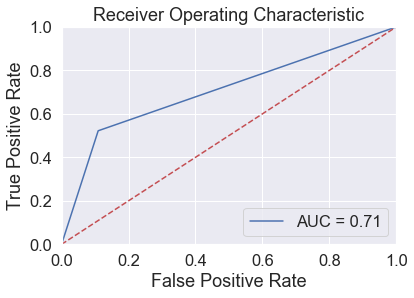

In [49]:
# result
result(Xtest,ytest)

#### Decision Tree Classification Model

In [50]:
parameters = {'min_samples_split': [10,100,1000,10000],
              'max_depth':[2,5,10,100,150,200,250]}

grid = GridSearchCV(estimator= DT, param_grid = parameters,cv = 10,scoring = 'accuracy')
grid.fit(Xtrain,ytrain)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_)

Best score: 0.791
Best parameters: {'max_depth': 5, 'min_samples_split': 10}


0.513421650440621 Contract_Month-to-month
0.20998831756776165 tenure
0.16055363516766505 InternetService_Fiber optic
0.05047306435559667 MonthlyCharges
0.029152519590877713 OnlineSecurity_No


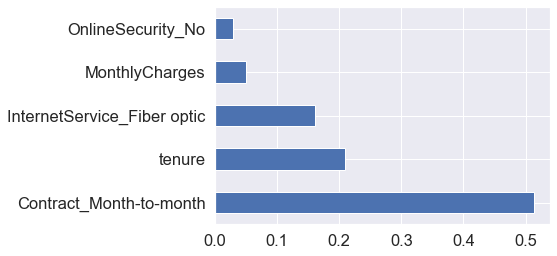

In [51]:
grid.best_estimator_.feature_importances_
for name, importance in sorted(zip(grid.best_estimator_.feature_importances_,Xtrain.columns),reverse= True)[:5]:
    print(name, importance)
    
featureimp_plot = pd.Series(grid.best_estimator_.feature_importances_, index = Xtrain.columns)
featureimp_plot.nlargest(5).plot(kind='barh')  

Accuracy score:0.80

Confusion Matrix:
 Predicted    0    1
Actual             
0          918  152
1          131  208


Classification report:
               precision    recall  f1-score   support

           0       0.88      0.86      0.87      1070
           1       0.58      0.61      0.60       339

    accuracy                           0.80      1409
   macro avg       0.73      0.74      0.73      1409
weighted avg       0.80      0.80      0.80      1409



Mean-squared error:
 0.4481647775646126



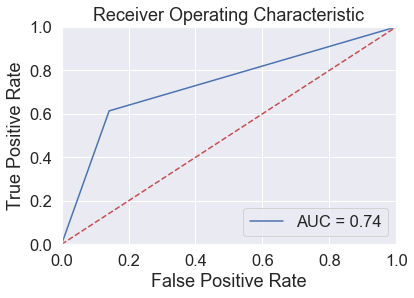

In [52]:
# result
result(Xtest,ytest)

#### Random Forest Classification Model

In [53]:
parameters = {'n_estimators': [1,5,10,100,200],'min_samples_split': [10,100,1000,10000],'max_depth':[2,5,10,100,150,200,250]}

grid = GridSearchCV(estimator= rfc, param_grid = parameters,cv = 10,scoring = 'accuracy')
grid.fit(Xtrain,ytrain)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_)

Best score: 0.804
Best parameters: {'max_depth': 100, 'min_samples_split': 100, 'n_estimators': 100}


0.27119031030765883 Contract_Month-to-month
0.24246701027773493 tenure
0.14080166949005368 OnlineSecurity_No
0.1223081286575189 InternetService_Fiber optic
0.10234768018219356 MonthlyCharges


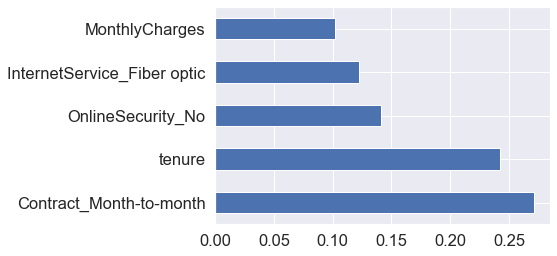

In [54]:
grid.best_estimator_.feature_importances_
for name, importance in sorted(zip(grid.best_estimator_.feature_importances_,Xtrain.columns),reverse= True)[:5]:
    print(name, importance)
    
featureimp_plot = pd.Series(grid.best_estimator_.feature_importances_, index = Xtrain.columns)
featureimp_plot.nlargest(5).plot(kind='barh')   

Accuracy score:0.80

Confusion Matrix:
 Predicted    0    1
Actual             
0          956  114
1          163  176


Classification report:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1070
           1       0.61      0.52      0.56       339

    accuracy                           0.80      1409
   macro avg       0.73      0.71      0.72      1409
weighted avg       0.79      0.80      0.80      1409



Mean-squared error:
 0.44338846241399343



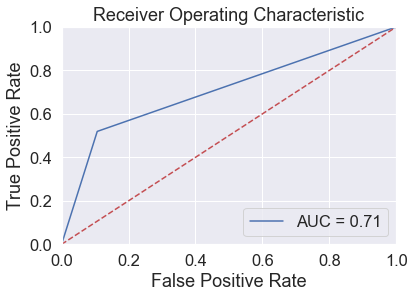

In [55]:
# result
result(Xtest,ytest)

#### XGBoost Classification Model

In [56]:
#conda install -c anaconda py-xgboost

In [59]:
import xgboost as xgb

In [60]:
#building the model & printing the score
parameter = {
'max_depth': [1,5,10,15],
'n_estimators': [50,100,150,300],
'learning_rate': [0.01, 0.1, 0.3],
}

grid = GridSearchCV(xgb.XGBClassifier(objective='binary:logistic'), param_grid = parameter, cv= 5, scoring='balanced_accuracy')
grid.fit(Xtrain,ytrain)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_)

Best score: 0.717
Best parameters: {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300}


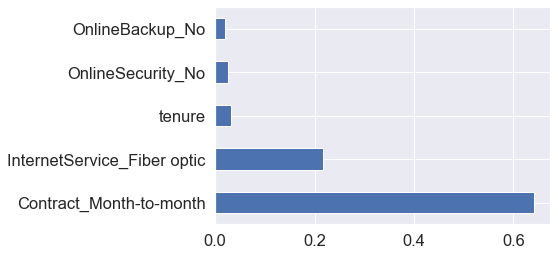

In [61]:
featureimp_plot = pd.Series(grid.best_estimator_.feature_importances_, index = Xtrain.columns)
featureimp_plot.nlargest(5).plot(kind='barh') 

Accuracy score:0.79

Confusion Matrix:
 Predicted    0    1
Actual             
0          940  130
1          162  177


Classification report:
               precision    recall  f1-score   support

           0       0.85      0.88      0.87      1070
           1       0.58      0.52      0.55       339

    accuracy                           0.79      1409
   macro avg       0.71      0.70      0.71      1409
weighted avg       0.79      0.79      0.79      1409



Mean-squared error:
 0.4552352981932297



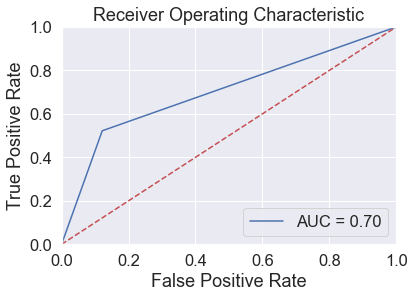

In [62]:
# result
result(Xtest,ytest)

#### SVC Classification Model

In [87]:
parameter = {'C': [5,10, 100]}
grid = GridSearchCV(svm.SVC(kernel='linear'), param_grid = parameter, cv= 4)

grid.fit(Xtrain,ytrain)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_)

Best score: 0.795
Best parameters: {'C': 100}


Accuracy score:0.81

Confusion Matrix:
 Predicted    0    1
Actual             
0          952  118
1          155  184


Classification report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      1070
           1       0.61      0.54      0.57       339

    accuracy                           0.81      1409
   macro avg       0.73      0.72      0.72      1409
weighted avg       0.80      0.81      0.80      1409



Mean-squared error:
 0.44017546020882364



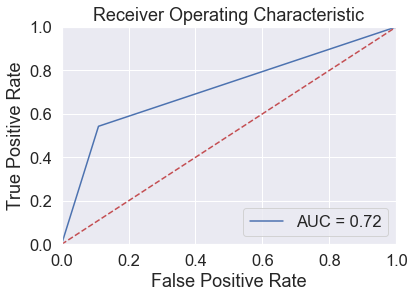

In [88]:
# result
result(Xtest,ytest)

We can summarize the result as follows:

**1.**: Variables such as contract type, status of online security, method of internet service provided, availability status of technical support and tenure are among the top 5 variables in the predictive analysis.

**2.**: Precision is greater than recall. The f1-score ranges between 0.55 and 0.62 for the 'churn' class.It is the highest for decision tree model.

**3.**: The AUC score ranges between 0.70 and 0.74. In terms of the AUC score, an optimal Decision Tree is the best model followed by SVM and XGBoost.

As I'm working with an unbalanced dataset, machine learning models can be bias in favor of the majority classi.e. no churn as opposed to the minority class i.e. churn. Given the objective of this study, understanding and predicting 'churn' becomes very important. But unbalanced dataset effect the prediction analysis for 'churn' with a lower recall value. In order to overcome this problem, I'm going to use SMOTE which is a type of an over-sampling method.

SMOTE balances the class distribution between 'churn' and 'no churn'. Under this method new observations for 'churn' are created between the existing 'no churn' observations. It generates the training sample by the linear transformation of the existing observations of the 'churn' class.

#### SMOTE (Synthetic Minority Oversampling Technique)

As I'm working with an unbalanced dataset, machine learning models can be biased in favor of the majority class i.e. no churn as opposed to the minority class i.e. churn. Given the objective of this study, predicting 'churn' becomes very important. But unbalanced dataset effect the prediction analysis for 'churn' with a lower recall value. In order to overcome this problem, I'm going to use SMOTE which is a type of an over-sampling method.

SMOTE balances the class distribution between 'churn' and 'no churn'. Under this method new observations for 'churn' are created between the existing 'no churn' observations. It generates the training sample by the linear transformation of the existing observations of the 'churn' class.

In [65]:
#!pip install imblearn

In [66]:
from imblearn.over_sampling import SMOTE

In [67]:
#Split train and test data
smote_train_X,smote_test_X,smote_train_Y,smote_test_Y = train_test_split(X,y,
                                                                         test_size = .25 ,
                                                                         random_state = 111)

#oversampling minority class using smote
os = SMOTE(random_state = 0)
os_smote_X,os_smote_Y = os.fit_sample(smote_train_X,smote_train_Y)
os_smote_X = pd.DataFrame(data = os_smote_X,columns= X.columns)
os_smote_Y = pd.DataFrame(data = os_smote_Y,columns= ['Churn'])

print(os_smote_X.shape)
print(os_smote_Y.shape)

(7694, 39)
(7694, 1)


In [68]:
rfe = RFE(rfc, 15)
rfe = rfe.fit(X, y)
print(rfe.support_)
print(rfe.ranking_)

#identified columns Recursive Feature Elimination
rfe_data = pd.DataFrame({"rfe_support" :rfe.support_,
                       "columns" : [i for i in X.columns if i not in Id_col + target_col],
                       "ranking" : rfe.ranking_,
                      })
selected_cols = rfe_data[rfe_data["rfe_support"] == True]["columns"].tolist()

rfe_data
print(selected_cols)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

[ True  True  True  True False  True  True  True  True False False False
  True False  True False False  True False False  True False False  True
 False False False False False False False False  True False False False
 False  True False]
[ 1  1  1  1 20  1  1  1  1 18  6 11  1 21  1 25 13  1 22  7  1 19 15  1
 23 10 12 24  3  2 17  9  1 14 16  8  4  1  5]
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PaperlessBilling', 'tenure', 'MonthlyCharges', 'MultipleLines_No', 'InternetService_Fiber optic', 'OnlineSecurity_No', 'OnlineBackup_No', 'DeviceProtection_No', 'TechSupport_No', 'Contract_Month-to-month', 'PaymentMethod_Electronic check']


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [69]:
# calculate the proportion of churn is now equal to the no churn
os_smote_Y.mean()

Churn    0.5
dtype: float64

In [70]:
#train and test data under SMOTE
train_smoterfe_X = os_smote_X[selected_cols]
train_smoterfe_Y = os_smote_Y.values.ravel()
test_smoterfe_X  = smote_test_X[selected_cols]
test_smoterfe_Y  = smote_test_Y

#### Logistic Regression with SMOTE

In [71]:
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(estimator=logreg, param_grid = parameters,cv = 10,scoring = 'accuracy')
grid.fit(train_smoterfe_X,train_smoterfe_Y)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_)


Best score: 0.768
Best parameters: {'C': 10}


Accuracy score:0.74

Confusion Matrix:
 Predicted    0    1
Actual             
0          954  373
1           87  347


Classification report:
               precision    recall  f1-score   support

           0       0.92      0.72      0.81      1327
           1       0.48      0.80      0.60       434

    accuracy                           0.74      1761
   macro avg       0.70      0.76      0.70      1761
weighted avg       0.81      0.74      0.76      1761



Mean-squared error:
 0.5110921821215628



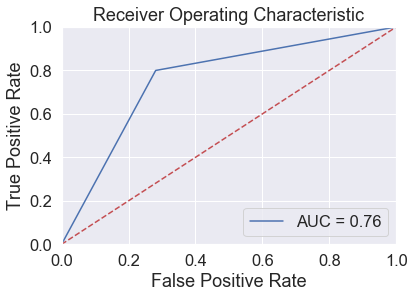

In [72]:
# result
result(test_smoterfe_X,test_smoterfe_Y)

#### Decision Tree with Smote    

Best score: 0.826
Best parameters: {'max_depth': 150, 'min_samples_split': 100}
0.49868111406463744 Contract_Month-to-month
0.12644268425347482 OnlineSecurity_No
0.10112432214619188 PaymentMethod_Electronic check
0.09739416615376055 tenure
0.07374788425882012 MonthlyCharges


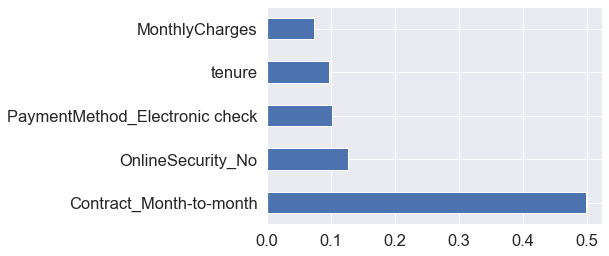

In [73]:
parameters = {'min_samples_split': [10,100,1000,10000],
              'max_depth':[2,5,10,100,150,200,250]}

grid = GridSearchCV(estimator= DT, param_grid = parameters,cv = 10,scoring = 'accuracy')
grid.fit(train_smoterfe_X,train_smoterfe_Y)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_) 

grid.best_estimator_.feature_importances_
for name, importance in sorted(zip(grid.best_estimator_.feature_importances_,train_smoterfe_X.columns),reverse= True)[:5]:
    print(name, importance)
    
featureimp_plot = pd.Series(grid.best_estimator_.feature_importances_, index = train_smoterfe_X.columns)
featureimp_plot.nlargest(5).plot(kind='barh')   

Accuracy score:0.78

Confusion Matrix:
 Predicted     0    1
Actual              
0          1099  228
1           164  270


Classification report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85      1327
           1       0.54      0.62      0.58       434

    accuracy                           0.78      1761
   macro avg       0.71      0.73      0.71      1761
weighted avg       0.79      0.78      0.78      1761



Mean-squared error:
 0.4718058869946827



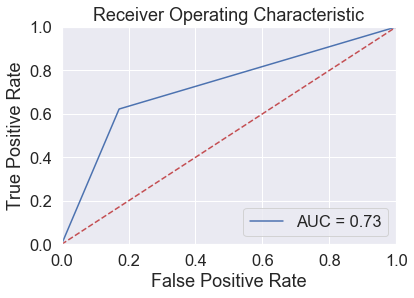

In [74]:
# result
result(test_smoterfe_X,test_smoterfe_Y)

#### Random Forest with SMOTE

In [75]:
parameters = {'n_estimators': [1,5,10,100,200],'min_samples_split': [10,100,1000,10000],'max_depth':[2,5,10,100,150,200,250]}

grid = GridSearchCV(estimator= rfc, param_grid = parameters,cv = 10,scoring = 'accuracy')
grid.fit(train_smoterfe_X,train_smoterfe_Y)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_)

Best score: 0.854
Best parameters: {'max_depth': 200, 'min_samples_split': 10, 'n_estimators': 200}


In [76]:
grid.best_estimator_.feature_importances_

array([0.03152663, 0.01944309, 0.03539404, 0.03258565, 0.04357473,
       0.15021246, 0.11274094, 0.01831412, 0.03649068, 0.09593698,
       0.04526662, 0.03277549, 0.09669796, 0.16012458, 0.08891605])

0.160124578625806 Contract_Month-to-month
0.1502124558193214 tenure
0.1127409353093857 MonthlyCharges
0.09669795606460857 TechSupport_No
0.0959369816708709 OnlineSecurity_No


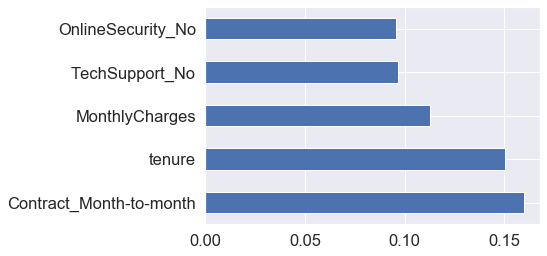

In [80]:
grid.best_estimator_.feature_importances_
for name, importance in sorted(zip(grid.best_estimator_.feature_importances_,train_smoterfe_X.columns),reverse= True)[:5]:
    print(name, importance)
    
featureimp_plot = pd.Series(grid.best_estimator_.feature_importances_, index = train_smoterfe_X.columns)
featureimp_plot.nlargest(5).plot(kind='barh')   

Accuracy score:0.80

Confusion Matrix:
 Predicted     0    1
Actual              
0          1146  181
1           176  258


Classification report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      1327
           1       0.59      0.59      0.59       434

    accuracy                           0.80      1761
   macro avg       0.73      0.73      0.73      1761
weighted avg       0.80      0.80      0.80      1761



Mean-squared error:
 0.45025073461399584



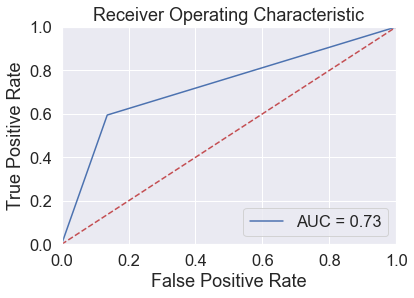

In [81]:
# result
result(test_smoterfe_X,test_smoterfe_Y)

#### XGBoost with SMOTE

In [82]:
#building the model & printing the score
parameter = {
'max_depth': [1,5,10,15],
'n_estimators': [50,100,150,300],
'learning_rate': [0.01, 0.1, 0.3],
}

grid = GridSearchCV(xgb.XGBClassifier(objective='binary:logistic'), param_grid = parameter, cv= 5, scoring='balanced_accuracy')
grid.fit(train_smoterfe_X,train_smoterfe_Y)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_)

Best score: 0.840
Best parameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}


0.42732525 Contract_Month-to-month
0.07793144 OnlineSecurity_No
0.07643298 PaymentMethod_Electronic check
0.075698815 TechSupport_No
0.06975491 InternetService_Fiber optic


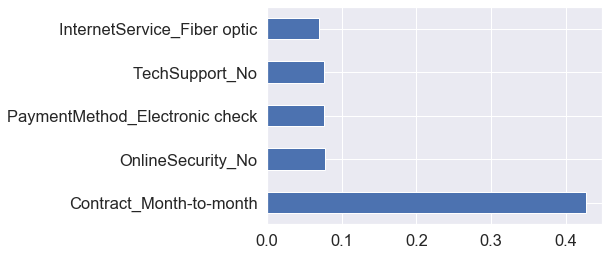

In [83]:
grid.best_estimator_.feature_importances_
for name, importance in sorted(zip(grid.best_estimator_.feature_importances_,train_smoterfe_X.columns),reverse= True)[:5]:
    print(name, importance)
    
featureimp_plot = pd.Series(grid.best_estimator_.feature_importances_, index = train_smoterfe_X.columns)
featureimp_plot.nlargest(5).plot(kind='barh')  

Accuracy score:0.80

Confusion Matrix:
 Predicted     0    1
Actual              
0          1140  187
1           165  269


Classification report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.87      1327
           1       0.59      0.62      0.60       434

    accuracy                           0.80      1761
   macro avg       0.73      0.74      0.74      1761
weighted avg       0.80      0.80      0.80      1761



Mean-squared error:
 0.44708660029776653



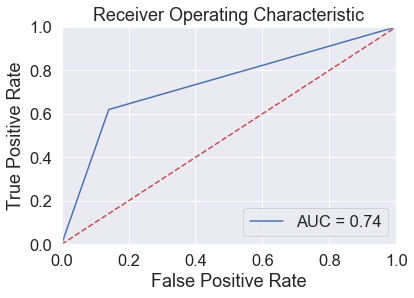

In [84]:
# result
result(test_smoterfe_X,test_smoterfe_Y)

#### SVM with SMOTE

In [85]:
parameter = {'C': [1,5,10, 100]}
grid = GridSearchCV(svm.SVC(kernel='linear'), param_grid = parameter, cv= 4)
grid.fit(train_smoterfe_X,train_smoterfe_Y)

print("Best score: %0.3f" % grid.best_score_)
print("Best parameters:", grid.best_params_)

Best score: 0.764
Best parameters: {'C': 100}


In [ ]:
# result
result(test_smoterfe_X,test_smoterfe_Y)

> ## IV. Conclusion:

**1.**: SMOTE has reduced the gap between precision and recall for the 'churn' class. Precision still remains higher than recall for the 'churn class' except for the Logistic Regression and linear SVM models. For these two models, recall becomes higher than precision. The recall value improved in majority of the models due to a lower False Negatives. The f1-score is between 0.60 and 0.65 for the 'churn' class. 

**2.**: The AUC score is now between 0.72 and 0.77. The AUC score decresed for the Decision Tree. Logistic Regression and linear SVM model has the highest AUC score of 0.77. In terms of AUC score, both these models are best suited for this study. I will prefer Logistic Regression because it is simple, intuitive and interpretable.